<a href="https://colab.research.google.com/github/KuzmiakKateryna/Analytics-with-python/blob/main/Global_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Mate_homework
countries = pd.read_csv("/content/drive/MyDrive/Mate_homework/countries.csv")
products = pd.read_csv("/content/drive/MyDrive/Mate_homework/products.csv")
events = pd.read_csv("/content/drive/MyDrive/Mate_homework/events.csv")

Mounted at /content/drive
/content/drive/MyDrive/Mate_homework


In [ ]:
countries.head() #дані про країни, регіони

name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia

In [ ]:
products.head() #тип продуктів та їх id

id        item_type
0  2103           Cereal
1  7940        Household
2  2455          Clothes
3  1270        Beverages
4  8681  Office Supplies

In [ ]:
events["profit"]=events["Units Sold"] - events["Unit Cost"] #створюємо стовпчик для розуміння загального прибутку
events["revenue"] = events["Units Sold"] * events["Unit Price"] #створюємо стовпчик для розуміння загального доходу
events["cost"] = events["Units Sold"] * events["Unit Cost"] #створюємо стовпчик для розуміння загальних витрат


events.head() #дані про продажі продуктів

Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost   profit     revenue  \
0        Online       650.0      205.70     117.11   532.89   133705.00   
1       Offline      1993.0      205.70     117.11  1875.89   409960.10   
2        Online      4693.0      668.27     502.54  4190.46  3136191.11   
3        Online      1171.0      109.28      35.84  1135.16   127966.88   
4       Offline      7648.0       47.45      31.79  7616.21   362897.60   

         cost  
0    76121.50  
1   233400.23  
2  2358420.22  
3    41968.64  
4   243129.92

In [ ]:
countries.isna().sum()/countries.shape[0] #визначаємо частку пропусків

name          0.000000
alpha-2       0.004016
alpha-3       0.000000
region        0.004016
sub-region    0.004016
dtype: float64

In [ ]:
products.isna().sum()/products.shape[0] #пропущених значень немає

id           0.0
item_type    0.0
dtype: float64

In [ ]:
events.isna().sum()/events.shape[0] #визначаємо частку пропусків

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      0.061654
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.001504
Unit Price        0.000000
Unit Cost         0.000000
profit            0.001504
revenue           0.001504
cost              0.001504
dtype: float64

In [ ]:
events["Country Code"] = events["Country Code"].fillna('Unknown') #оскільки частка невідомих значень суттєва, замінимо її на Unknown для подальшого аналізу

In [ ]:
#видаляємо рядки з пропущеними значеннями, які не впливають на аналіз даних
ev = events.dropna(subset=["Units Sold"])
co = countries.dropna(subset=["alpha-2", "region", "sub-region"])
pr = products

In [ ]:
#перевіряємо, чи всі типи даних розпізнаються коректно
print(ev.dtypes)
print(co.dtypes)
print(pr.dtypes)

Order ID            int64
Order Date         object
Ship Date          object
Order Priority     object
Country Code       object
Product ID          int64
Sales Channel      object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
profit            float64
revenue           float64
cost              float64
dtype: object
name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object
id            int64
item_type    object
dtype: object


In [ ]:
#виправлення некоректних даних
ev["Order Date"] = pd.to_datetime(events['Order Date'])
ev["Ship Date"] = pd.to_datetime(events['Ship Date'])

/tmp/ipython-input-11-4094120711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev["Order Date"] = pd.to_datetime(events['Order Date'])
/tmp/ipython-input-11-4094120711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev["Ship Date"] = pd.to_datetime(events['Ship Date'])


In [ ]:
#перетворення даних
ev = ev.apply(lambda col: col.str.lower().str.strip() if col.dtypes == 'object' else col)
co = co.apply(lambda col: col.str.lower().str.strip() if col.dtypes == 'object' else col)
pr = pr.apply(lambda col: col.str.lower().str.strip() if col.dtypes == 'object' else col)

In [ ]:
#пошук дублікатів
print(ev[ev.duplicated()])
print(co[co.duplicated()])
print(pr[pr.duplicated()])

Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Order Priority, Country Code, Product ID, Sales Channel, Units Sold, Unit Price, Unit Cost, profit, revenue, cost]
Index: []
Empty DataFrame
Columns: [name, alpha-2, alpha-3, region, sub-region]
Index: []
Empty DataFrame
Columns: [id, item_type]
Index: []


In [ ]:
#дослідження даних на наявність аномалій
print(ev.describe())
print(co.describe())
print(pr.describe())

           Order ID                     Order Date  \
count  1.328000e+03                           1328   
mean   5.416231e+08  2013-10-11 22:28:54.939759104   
min    1.006406e+08            2010-01-01 00:00:00   
25%    3.213291e+08            2011-12-14 06:00:00   
50%    5.399925e+08            2013-10-15 12:00:00   
75%    7.547357e+08            2015-08-29 12:00:00   
max    9.998797e+08            2017-07-23 00:00:00   
std    2.573496e+08                            NaN   

                           Ship Date   Product ID   Units Sold   Unit Price  \
count                           1328  1328.000000  1328.000000  1328.000000   
mean   2013-11-05 17:22:02.891566336  5787.775602  4952.201807   264.913245   
min              2010-01-10 00:00:00  1270.000000     2.000000     9.330000   
25%              2012-01-02 00:00:00  3127.000000  2356.750000    81.730000   
50%              2013-11-05 12:00:00  5988.000000  4962.000000   154.060000   
75%              2015-10-04 18:00:00  8

In [ ]:
#об'єднання таблиць в одну
pr = pr.rename(columns={"id": "Product ID"})
left_join = pd.merge(ev, pr, on = "Product ID", how = "left")
co = co.rename(columns={"alpha-3": "Country Code"})
df = pd.merge(left_join, co, on = "Country Code", how = "left")
print(df)

       Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0     100640618 2014-10-08 2014-10-18              m          nor        2103   
1     100983083 2016-08-11 2016-08-11              c          srb        2103   
2     101025998 2014-07-18 2014-08-11              m      unknown        7940   
3     102230632 2017-05-13 2017-06-13              l          mne        2455   
4     103435266 2012-08-11 2012-09-18              h          srb        1270   
...         ...        ...        ...            ...          ...         ...   
1323  994504153 2017-01-10 2017-01-13              m          swe        4594   
1324  994978797 2014-12-05 2015-01-02              h          ita        1270   
1325  996754205 2010-09-20 2010-09-22              l          rus        7331   
1326  998043382 2010-06-15 2010-07-03              h          mlt        8293   
1327  999879729 2012-03-31 2012-05-06              m          alb        7940   

     Sales Channel  Units S

In [ ]:
#зміна назв стовпців
df.columns = df.columns.str.lower()
df = df.rename(columns={"name": "country"})
print(df)

       order id order date  ship date order priority country code  product id  \
0     100640618 2014-10-08 2014-10-18              m          nor        2103   
1     100983083 2016-08-11 2016-08-11              c          srb        2103   
2     101025998 2014-07-18 2014-08-11              m      unknown        7940   
3     102230632 2017-05-13 2017-06-13              l          mne        2455   
4     103435266 2012-08-11 2012-09-18              h          srb        1270   
...         ...        ...        ...            ...          ...         ...   
1323  994504153 2017-01-10 2017-01-13              m          swe        4594   
1324  994978797 2014-12-05 2015-01-02              h          ita        1270   
1325  996754205 2010-09-20 2010-09-22              l          rus        7331   
1326  998043382 2010-06-15 2010-07-03              h          mlt        8293   
1327  999879729 2012-03-31 2012-05-06              m          alb        7940   

     sales channel  units s

In [ ]:
#видалення непотрібних стовпців
df = df.drop("alpha-2", axis=1)
df = df.drop("country code", axis=1)

In [ ]:
unit_sum = df["units sold"].sum() #загальна кількість проданих одиниць товару
total_profit = df["profit"].sum() #загальний прибуток
mean_profit = df["profit"].mean() #середній прибуток
country = df["country"].nunique() #кількість країн охоплення


print(f"Загальна кількість проданих одиниць товару:", unit_sum)
print(f"Загальний прибуток:", total_profit, "$")
print(f"Середній прибуток:", mean_profit, "$")
print(f"Кількість країн охоплення:", country)

Загальна кількість проданих одиниць товару: 6576524.0
Загальний прибуток: 6327907.1 $
Середній прибуток: 4764.990286144578 $
Кількість країн охоплення: 45


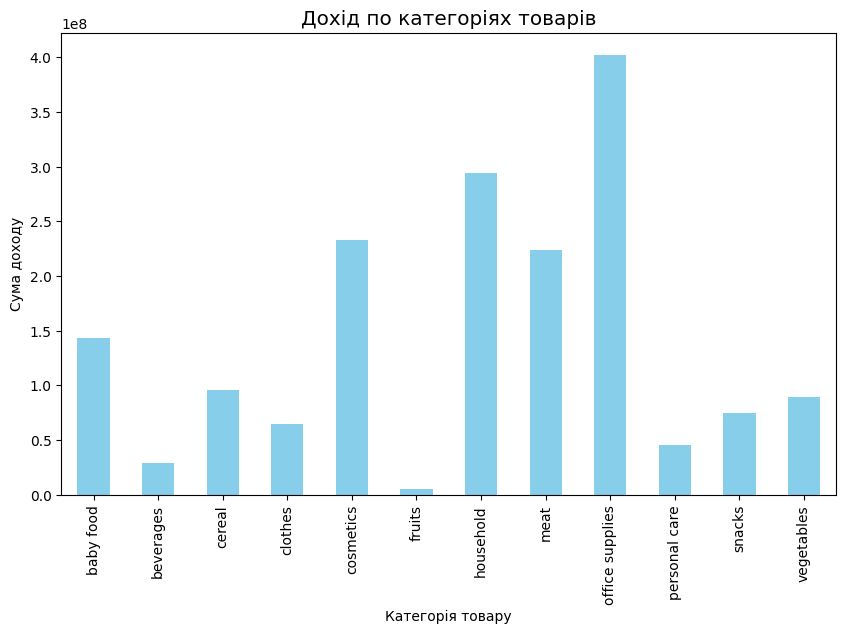

In [ ]:
#Дохід по категоріях товарів
revenue_category = df.groupby("item_type")["revenue"].sum()
plt.figure(figsize=(10, 6))
revenue_category.plot(kind="bar", color="skyblue")
y_ticks = np.arange(0, revenue_category.max() + 100, 50000000)
plt.yticks(y_ticks)
plt.style.use("ggplot")
plt.title("Дохід по категоріях товарів")
plt.xlabel("Категорія товару")
plt.ylabel("Сума доходу")
plt.show()

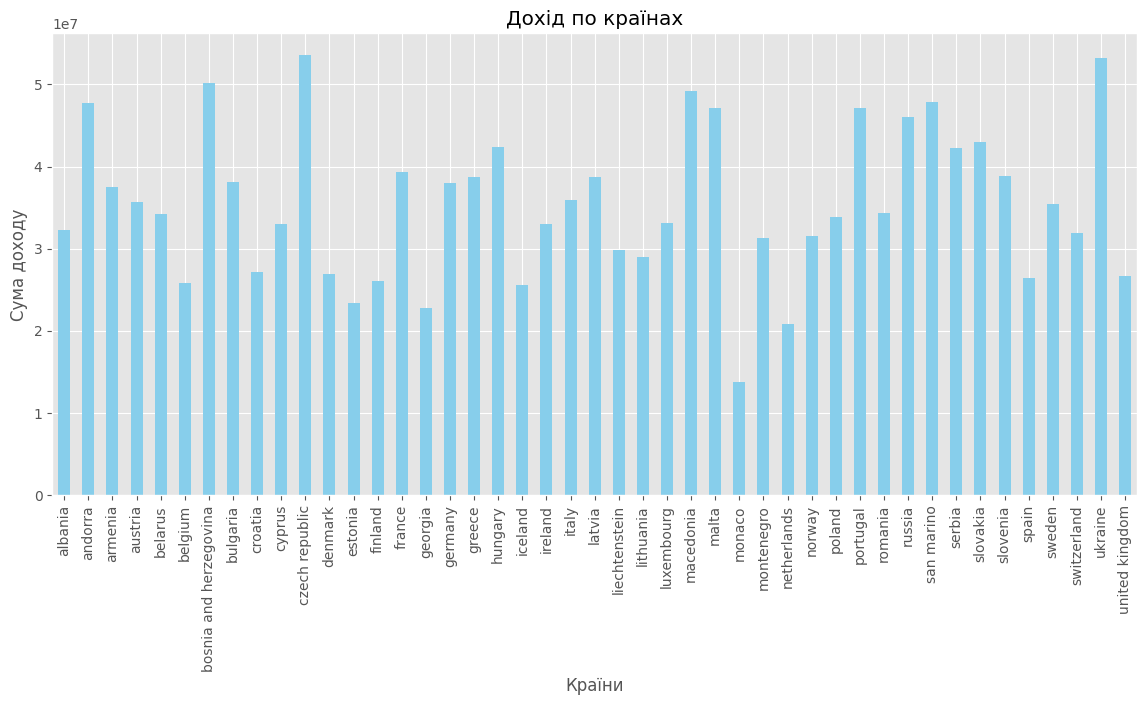

In [ ]:
#Дохід по країнах
country = df.groupby("country")["revenue"].sum()
plt.figure(figsize=(14, 6))
country.plot(kind="bar", color="skyblue")
y_ticks = np.arange(0, country.max() + 1000, 10000000)
plt.yticks(y_ticks)
plt.style.use("ggplot")
plt.title("Дохід по країнах")
plt.xlabel("Країни")
plt.ylabel("Сума доходу")
plt.show()

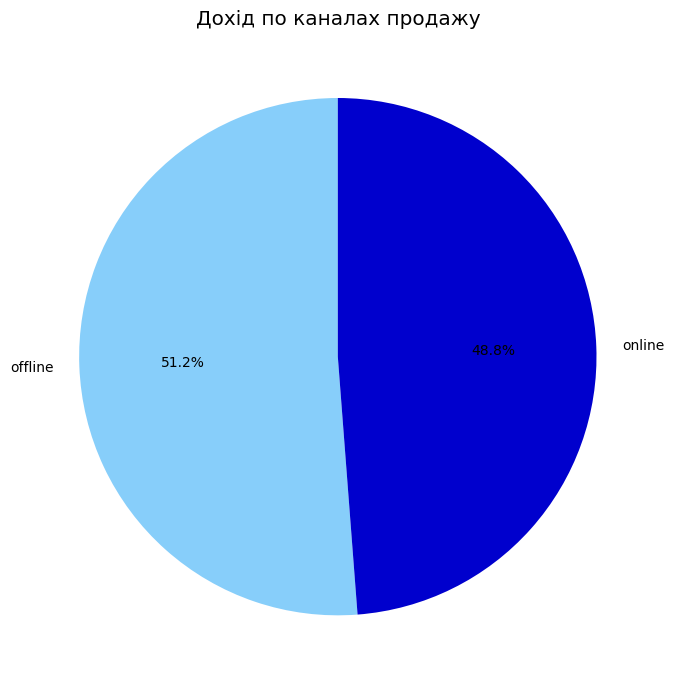

In [ ]:
#Дохід по каналах продажу
channel = df.groupby("sales channel")["revenue"].sum()
plt.figure(figsize=(7, 7))
plt.style.use("ggplot")
plt.pie(channel, labels=channel.index, autopct='%1.1f%%', startangle=90, colors = ['#87CEFA', '#0000CD'] )
plt.title("Дохід по каналах продажу")
plt.tight_layout()
plt.show()

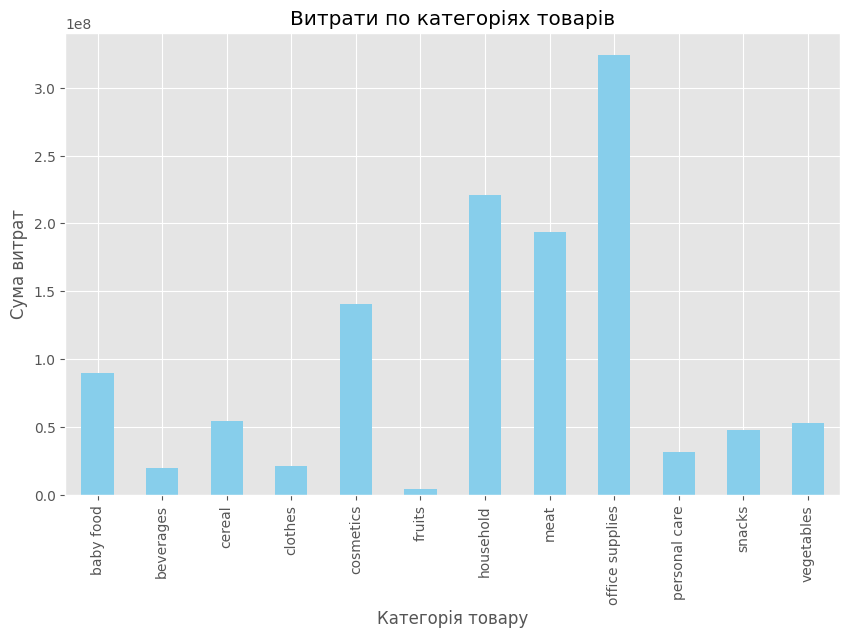

In [ ]:
#Витрати по категоріях товарів
cost_category = df.groupby("item_type")["cost"].sum()
plt.figure(figsize=(10, 6))
cost_category.plot(kind="bar", color="skyblue")
y_ticks = np.arange(0, cost_category.max() + 100, 50000000)
plt.yticks(y_ticks)
plt.style.use("ggplot")
plt.title("Витрати по категоріях товарів")
plt.xlabel("Категорія товару")
plt.ylabel("Сума витрат")
plt.show()

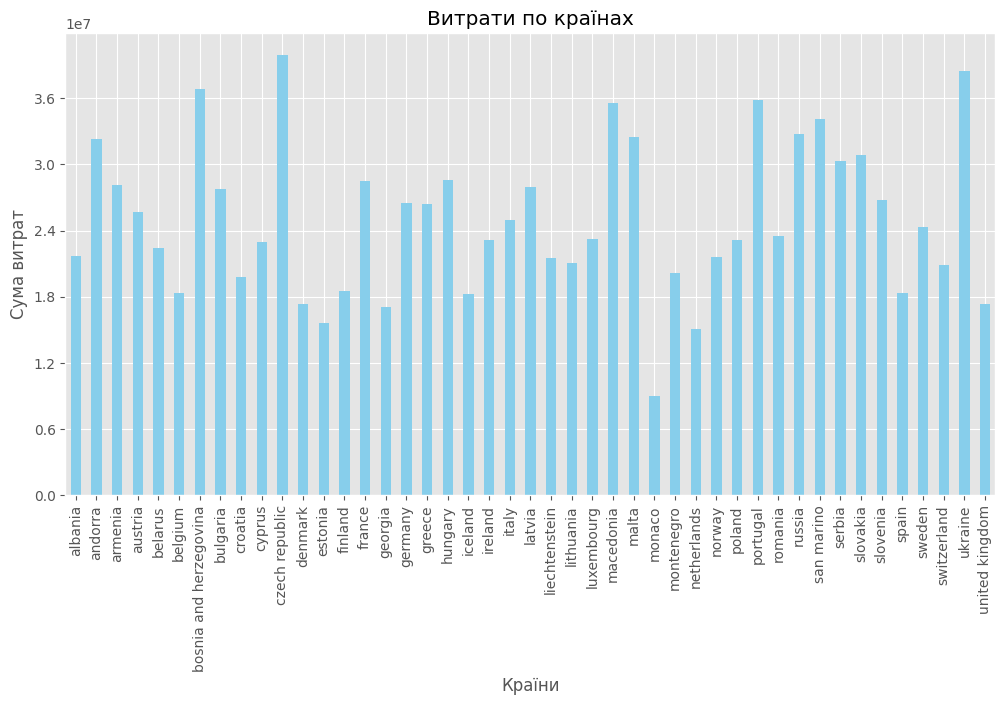

In [ ]:
#Витрати по країнах
cost_country = df.groupby("country")["cost"].sum()
plt.figure(figsize=(12, 6))
cost_country.plot(kind="bar", color="skyblue")
y_ticks = np.arange(0, cost_country.max() + 100, 6000000)
plt.yticks(y_ticks)
plt.style.use("ggplot")
plt.title("Витрати по країнах")
plt.xlabel("Країни")
plt.ylabel("Сума витрат")
plt.show()

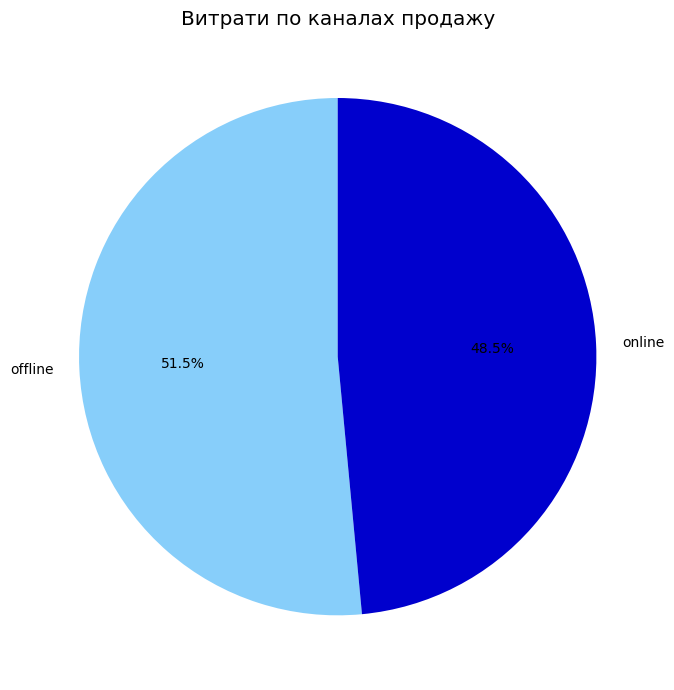

In [ ]:
#Витрати по каналах продажу
channel = df.groupby("sales channel")["cost"].sum()
plt.figure(figsize=(7, 7))
plt.style.use("ggplot")
plt.pie(channel, labels=channel.index, autopct='%1.1f%%', startangle=90, colors = ['#87CEFA', '#0000CD'] )
plt.title("Витрати по каналах продажу")
plt.tight_layout()
plt.show()

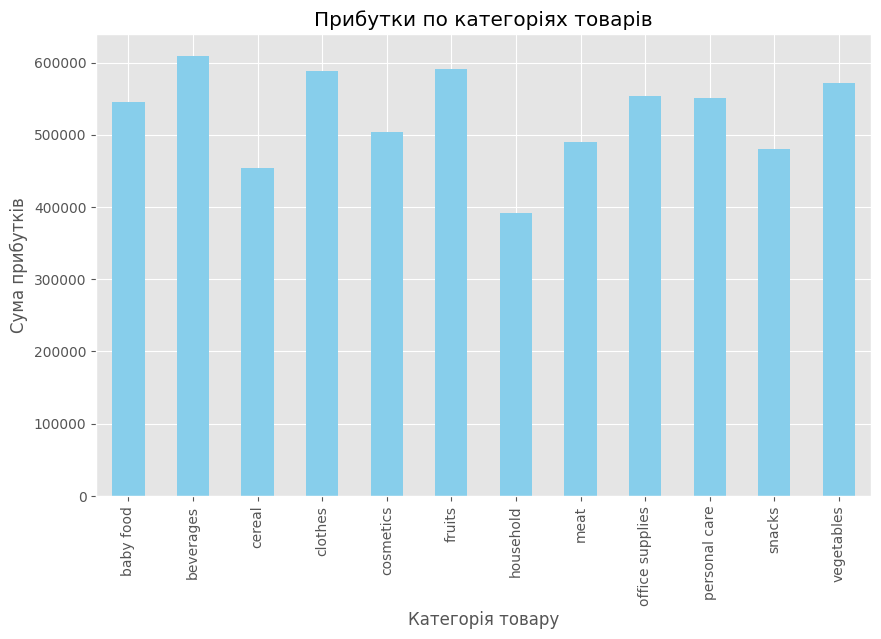

In [ ]:
#Прибутки по категоріях товарів
profit_category = df.groupby("item_type")["profit"].sum()
plt.figure(figsize=(10, 6))
profit_category.plot(kind="bar", color="skyblue")
y_ticks = np.arange(0, profit_category.max() + 300, 100000)
plt.yticks(y_ticks)
plt.style.use("ggplot")
plt.title("Прибутки по категоріях товарів")
plt.xlabel("Категорія товару")
plt.ylabel("Сума прибутків")
plt.show()

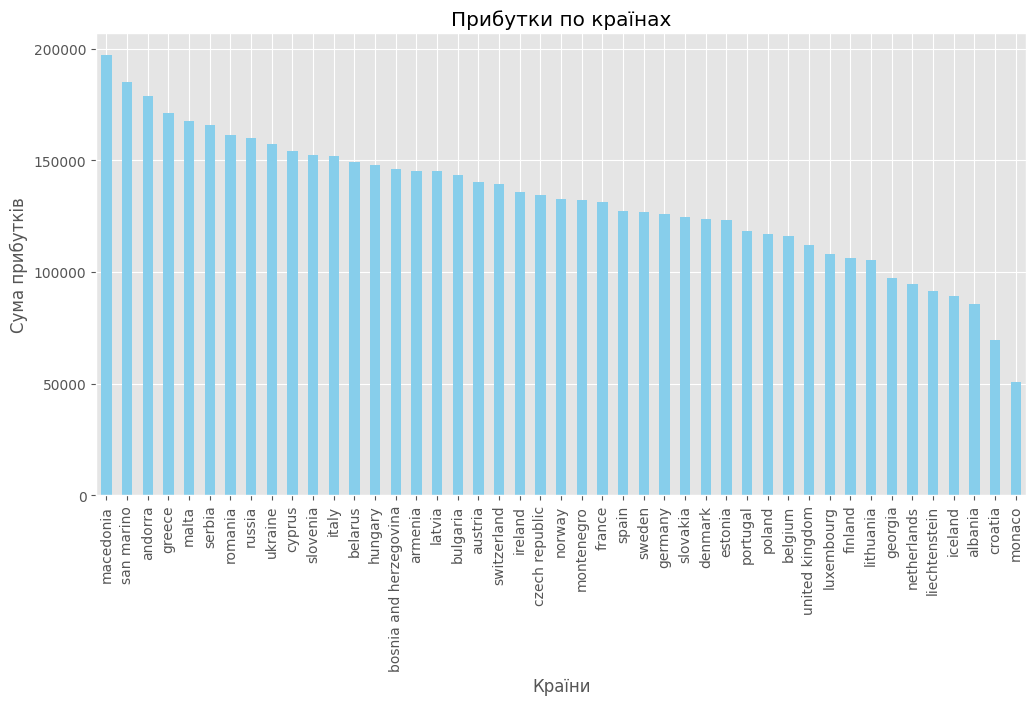

In [ ]:
#Прибутки по країнах
profit_country = df.groupby("country")["profit"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
profit_country.plot(kind="bar", color="skyblue")
y_ticks = np.arange(0, profit_country.max() + 3000, 50000)
plt.yticks(y_ticks)
plt.style.use("ggplot")
plt.title("Прибутки по країнах")
plt.xlabel("Країни")
plt.ylabel("Сума прибутків")
plt.show()

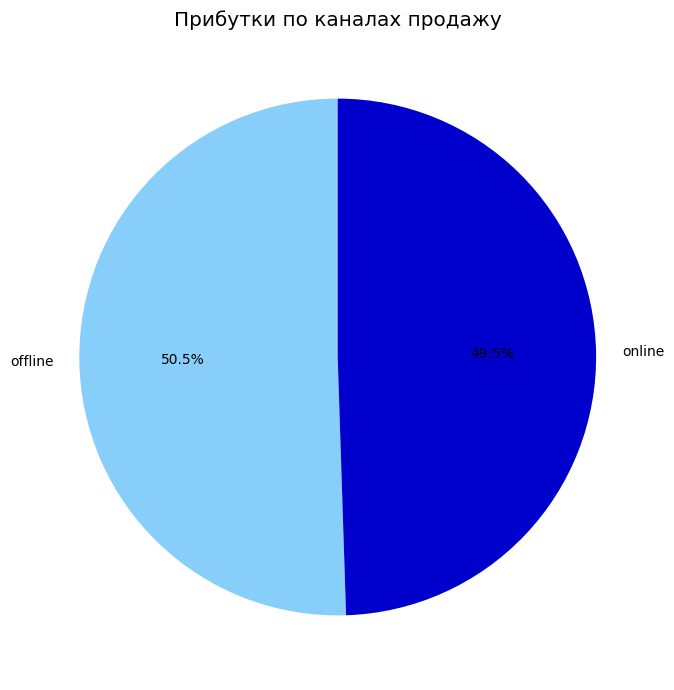

In [ ]:
#Прибутки по каналах продажу
channel = df.groupby("sales channel")["profit"].sum()
plt.figure(figsize=(7, 7))
plt.style.use("ggplot")
plt.pie(channel, labels=channel.index, autopct='%1.1f%%', startangle=90, colors = ['#87CEFA', '#0000CD'] )
plt.title("Прибутки по каналах продажу")
plt.tight_layout()
plt.show()

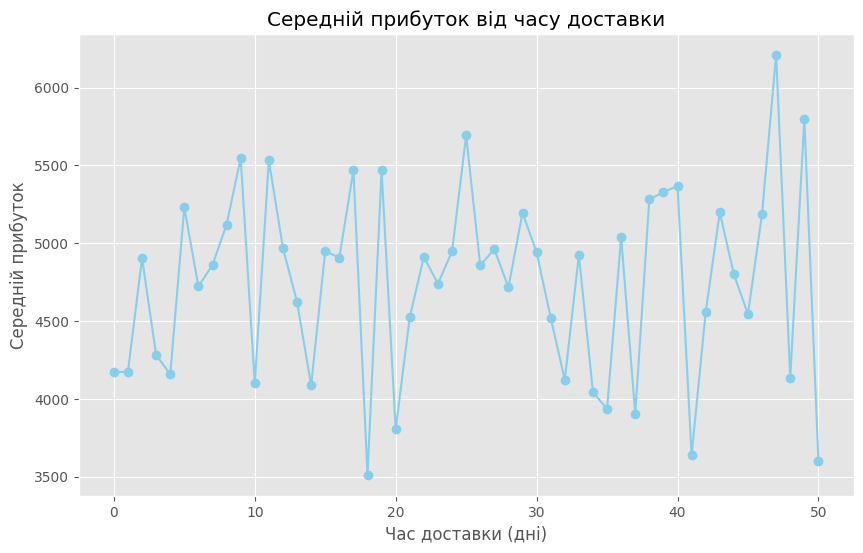

In [ ]:
#прибуток залежно від часу доставки
df["delivery_days"] = (df["ship date"] - df["order date"]).dt.days
agg = df.groupby("delivery_days")["profit"].mean()
plt.figure(figsize=(10, 6))
agg.plot(kind="line", marker="o", color="skyblue")
plt.style.use("ggplot")
plt.title("Середній прибуток від часу доставки")
plt.xlabel("Час доставки (дні)")
plt.ylabel("Середній прибуток")
plt.show()

In [ ]:
df["item_type"].unique()
df["country"].unique()

array(['norway', 'serbia', nan, 'montenegro', 'slovakia', 'france',
       'spain', 'croatia', 'germany', 'armenia', 'georgia',
       'united kingdom', 'slovenia', 'romania', 'poland', 'luxembourg',
       'cyprus', 'belgium', 'lithuania', 'russia', 'malta', 'ukraine',
       'czech republic', 'portugal', 'belarus', 'estonia', 'austria',
       'macedonia', 'san marino', 'netherlands', 'switzerland', 'hungary',
       'latvia', 'bulgaria', 'italy', 'ireland', 'andorra',
       'liechtenstein', 'finland', 'albania', 'sweden',
       'bosnia and herzegovina', 'denmark', 'monaco', 'iceland', 'greece'],
      dtype=object)

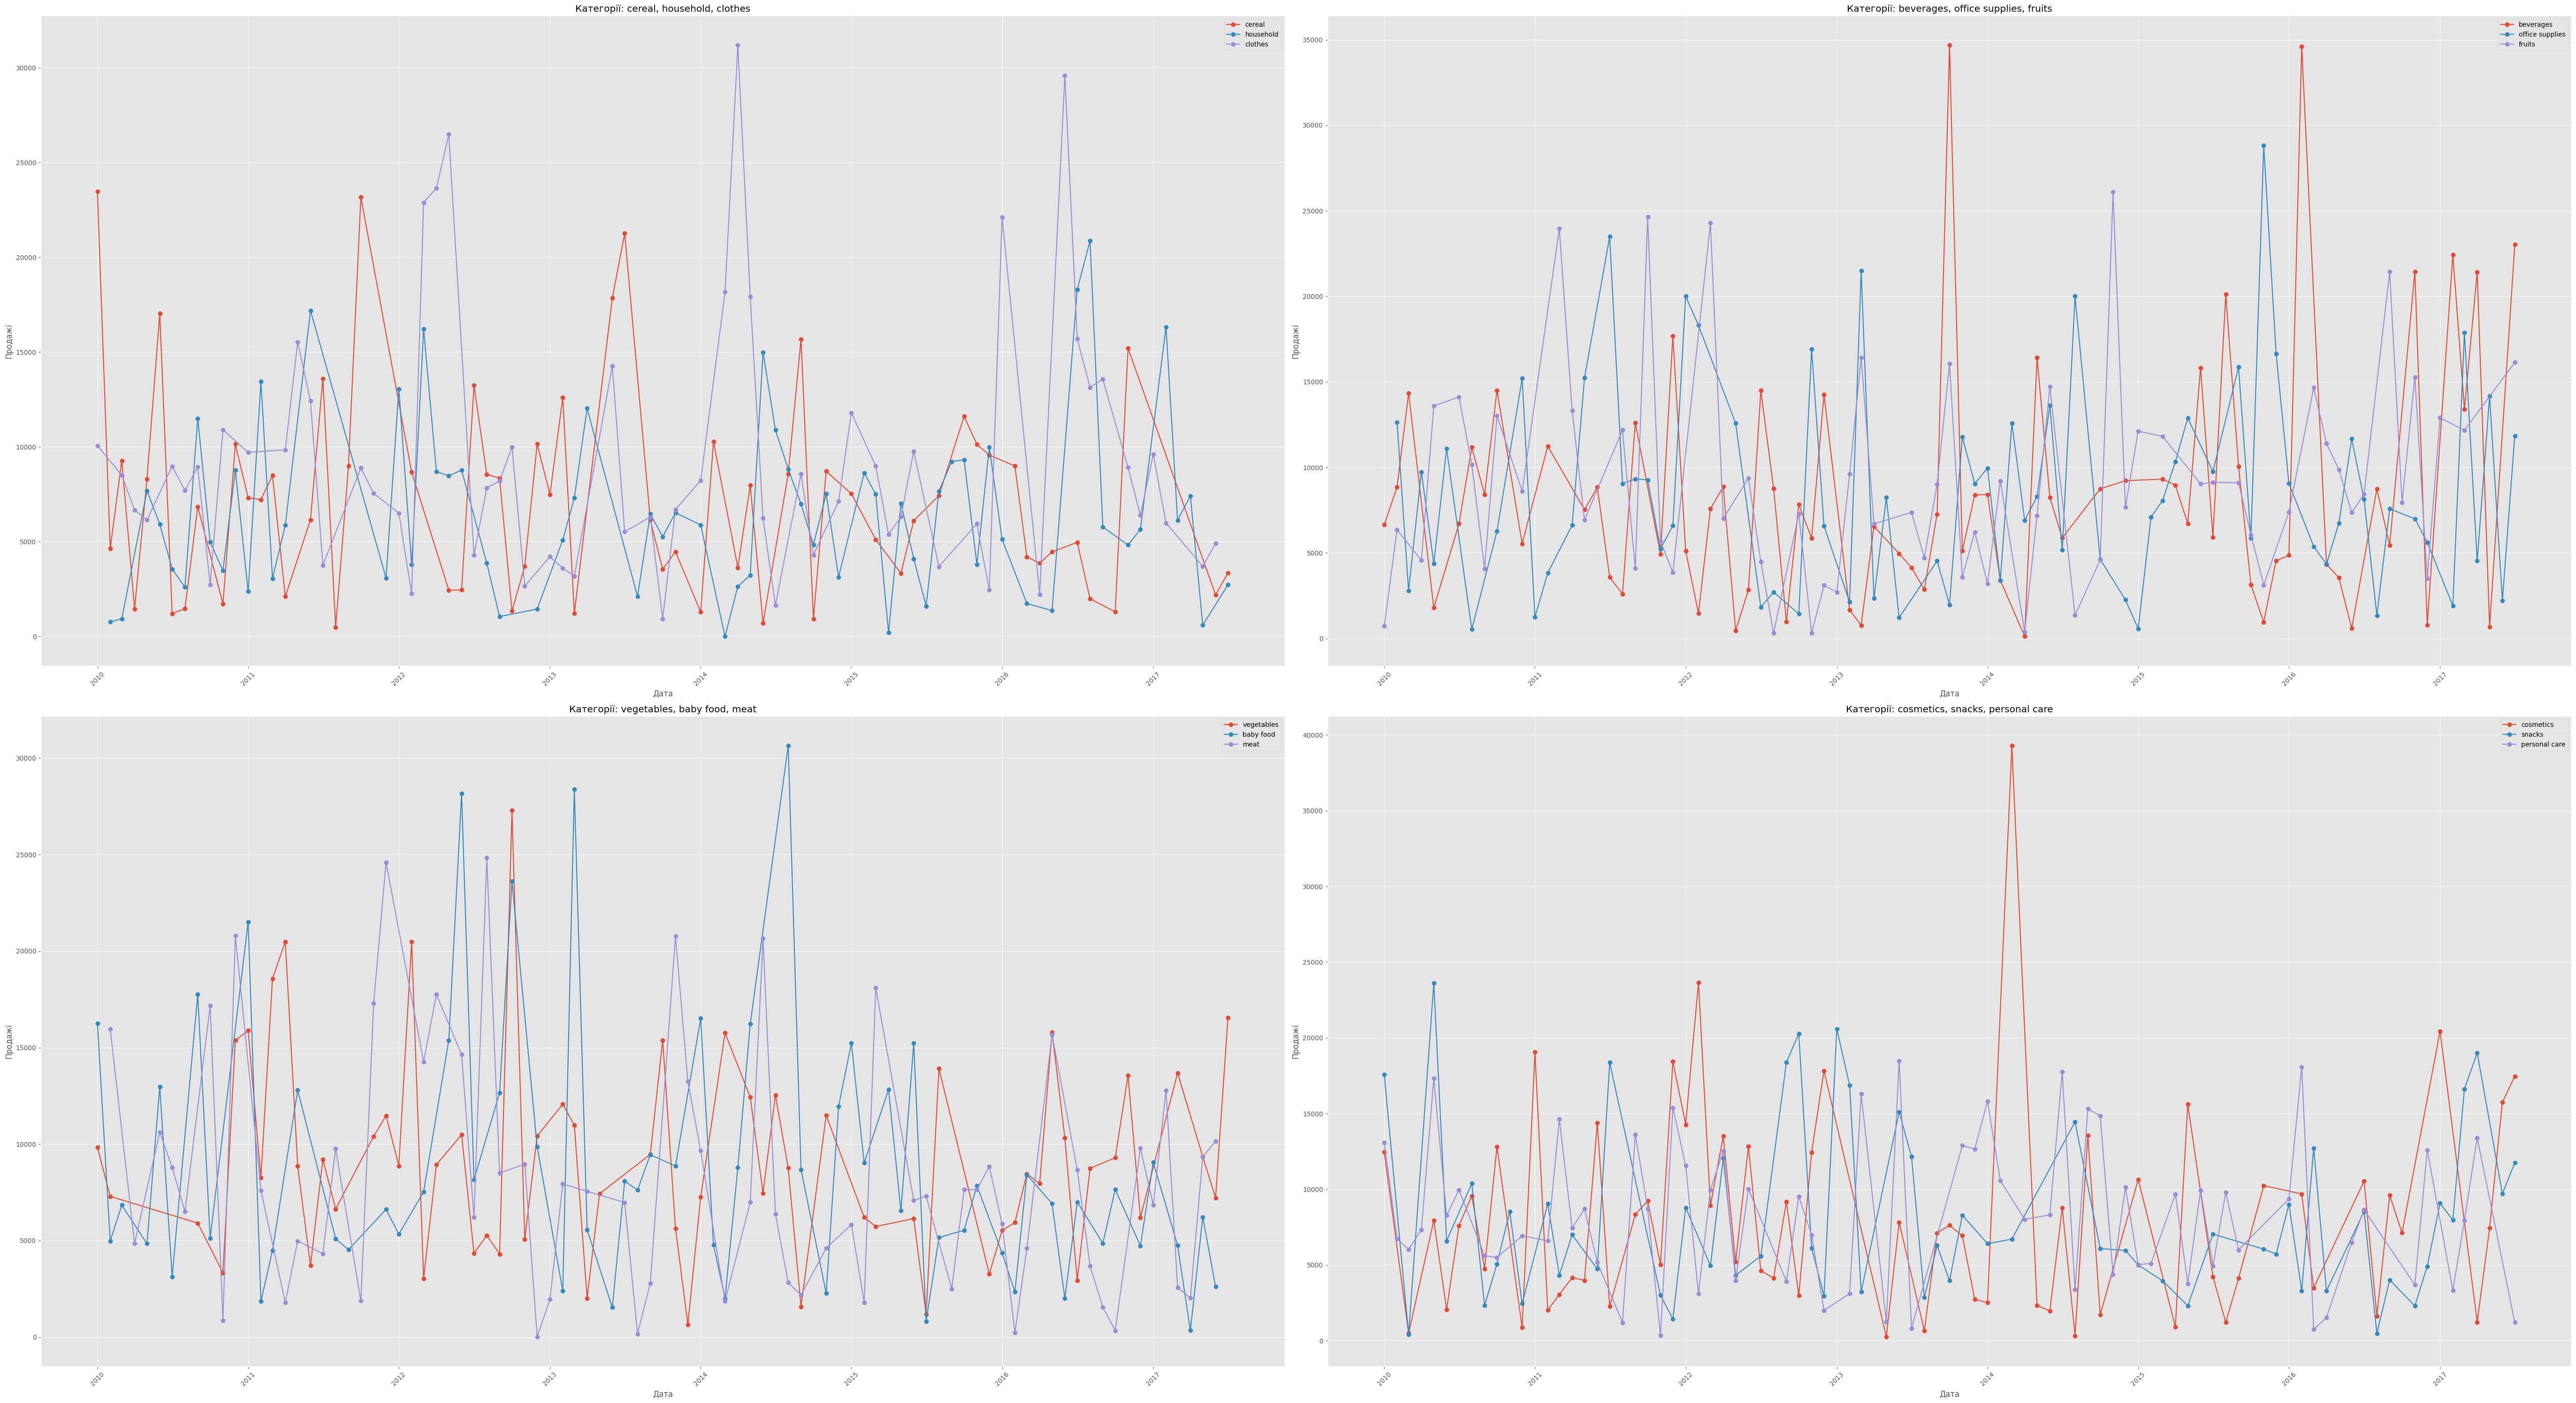

In [ ]:
#Створюємо колонку "month" для групування по місяцях
df["month"] = df["order date"].dt.to_period('M').dt.to_timestamp()
#Групуємо по місяцях і категоріях, сумуємо "units sold"
df_grouped = df.groupby(["month", "item_type"])["units sold"].sum().reset_index()

fig, ax = plt.subplots(2, 2, figsize=(55, 30))

cereal = df_grouped[df_grouped["item_type"] == "cereal"]
household = df_grouped[df_grouped["item_type"] == "household"]
clothes = df_grouped[df_grouped["item_type"] == "clothes"]
ax[0, 0].plot(cereal["month"], cereal["units sold"], label="cereal", marker='o')
ax[0, 0].plot(household["month"], household["units sold"], label="household", marker='o')
ax[0, 0].plot(clothes["month"], clothes["units sold"], label="clothes", marker='o')
ax[0, 0].set_title("Категорії: cereal, household, clothes")
ax[0, 0].legend()
ax[0, 0].set_xlabel("Дата")
ax[0, 0].set_ylabel("Продажі")
ax[0, 0].grid(True)
ax[0, 0].tick_params(axis='x', rotation=45)

beverages = df_grouped[df_grouped["item_type"] == "beverages"]
office_supplies = df_grouped[df_grouped["item_type"] == "office supplies"]
fruits = df_grouped[df_grouped["item_type"] == "fruits"]
ax[0, 1].plot(beverages["month"], beverages["units sold"], label="beverages", marker='o')
ax[0, 1].plot(office_supplies["month"], office_supplies["units sold"], label="office supplies", marker='o')
ax[0, 1].plot(fruits["month"], fruits["units sold"], label="fruits", marker='o')
ax[0, 1].set_title("Категорії: beverages, office supplies, fruits")
ax[0, 1].legend()
ax[0, 1].set_xlabel("Дата")
ax[0, 1].set_ylabel("Продажі")
ax[0, 1].grid(True)
ax[0, 1].tick_params(axis='x', rotation=45)

vegetables = df_grouped[df_grouped["item_type"] == "vegetables"]
baby_food = df_grouped[df_grouped["item_type"] == "baby food"]
meat = df_grouped[df_grouped["item_type"] == "meat"]
ax[1, 0].plot(vegetables["month"], vegetables["units sold"], label="vegetables", marker='o')
ax[1, 0].plot(baby_food["month"], baby_food["units sold"], label="baby food", marker='o')
ax[1, 0].plot(meat["month"], meat["units sold"], label="meat", marker='o')
ax[1, 0].set_title("Категорії: vegetables, baby food, meat")
ax[1, 0].legend()
ax[1, 0].set_xlabel("Дата")
ax[1, 0].set_ylabel("Продажі")
ax[1, 0].grid(True)
ax[1, 0].tick_params(axis='x', rotation=45)

cosmetics = df_grouped[df_grouped["item_type"] == "cosmetics"]
snacks = df_grouped[df_grouped["item_type"] == "snacks"]
personal_care = df_grouped[df_grouped["item_type"] == "personal care"]
ax[1, 1].plot(cosmetics["month"], cosmetics["units sold"], label="cosmetics", marker='o')
ax[1, 1].plot(snacks["month"], snacks["units sold"], label="snacks", marker='o')
ax[1, 1].plot(personal_care["month"], personal_care["units sold"], label="personal care", marker='o')
ax[1, 1].set_title("Категорії: cosmetics, snacks, personal care")
ax[1, 1].legend()
ax[1, 1].set_xlabel("Дата")
ax[1, 1].set_ylabel("Продажі")
ax[1, 1].grid(True)
ax[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

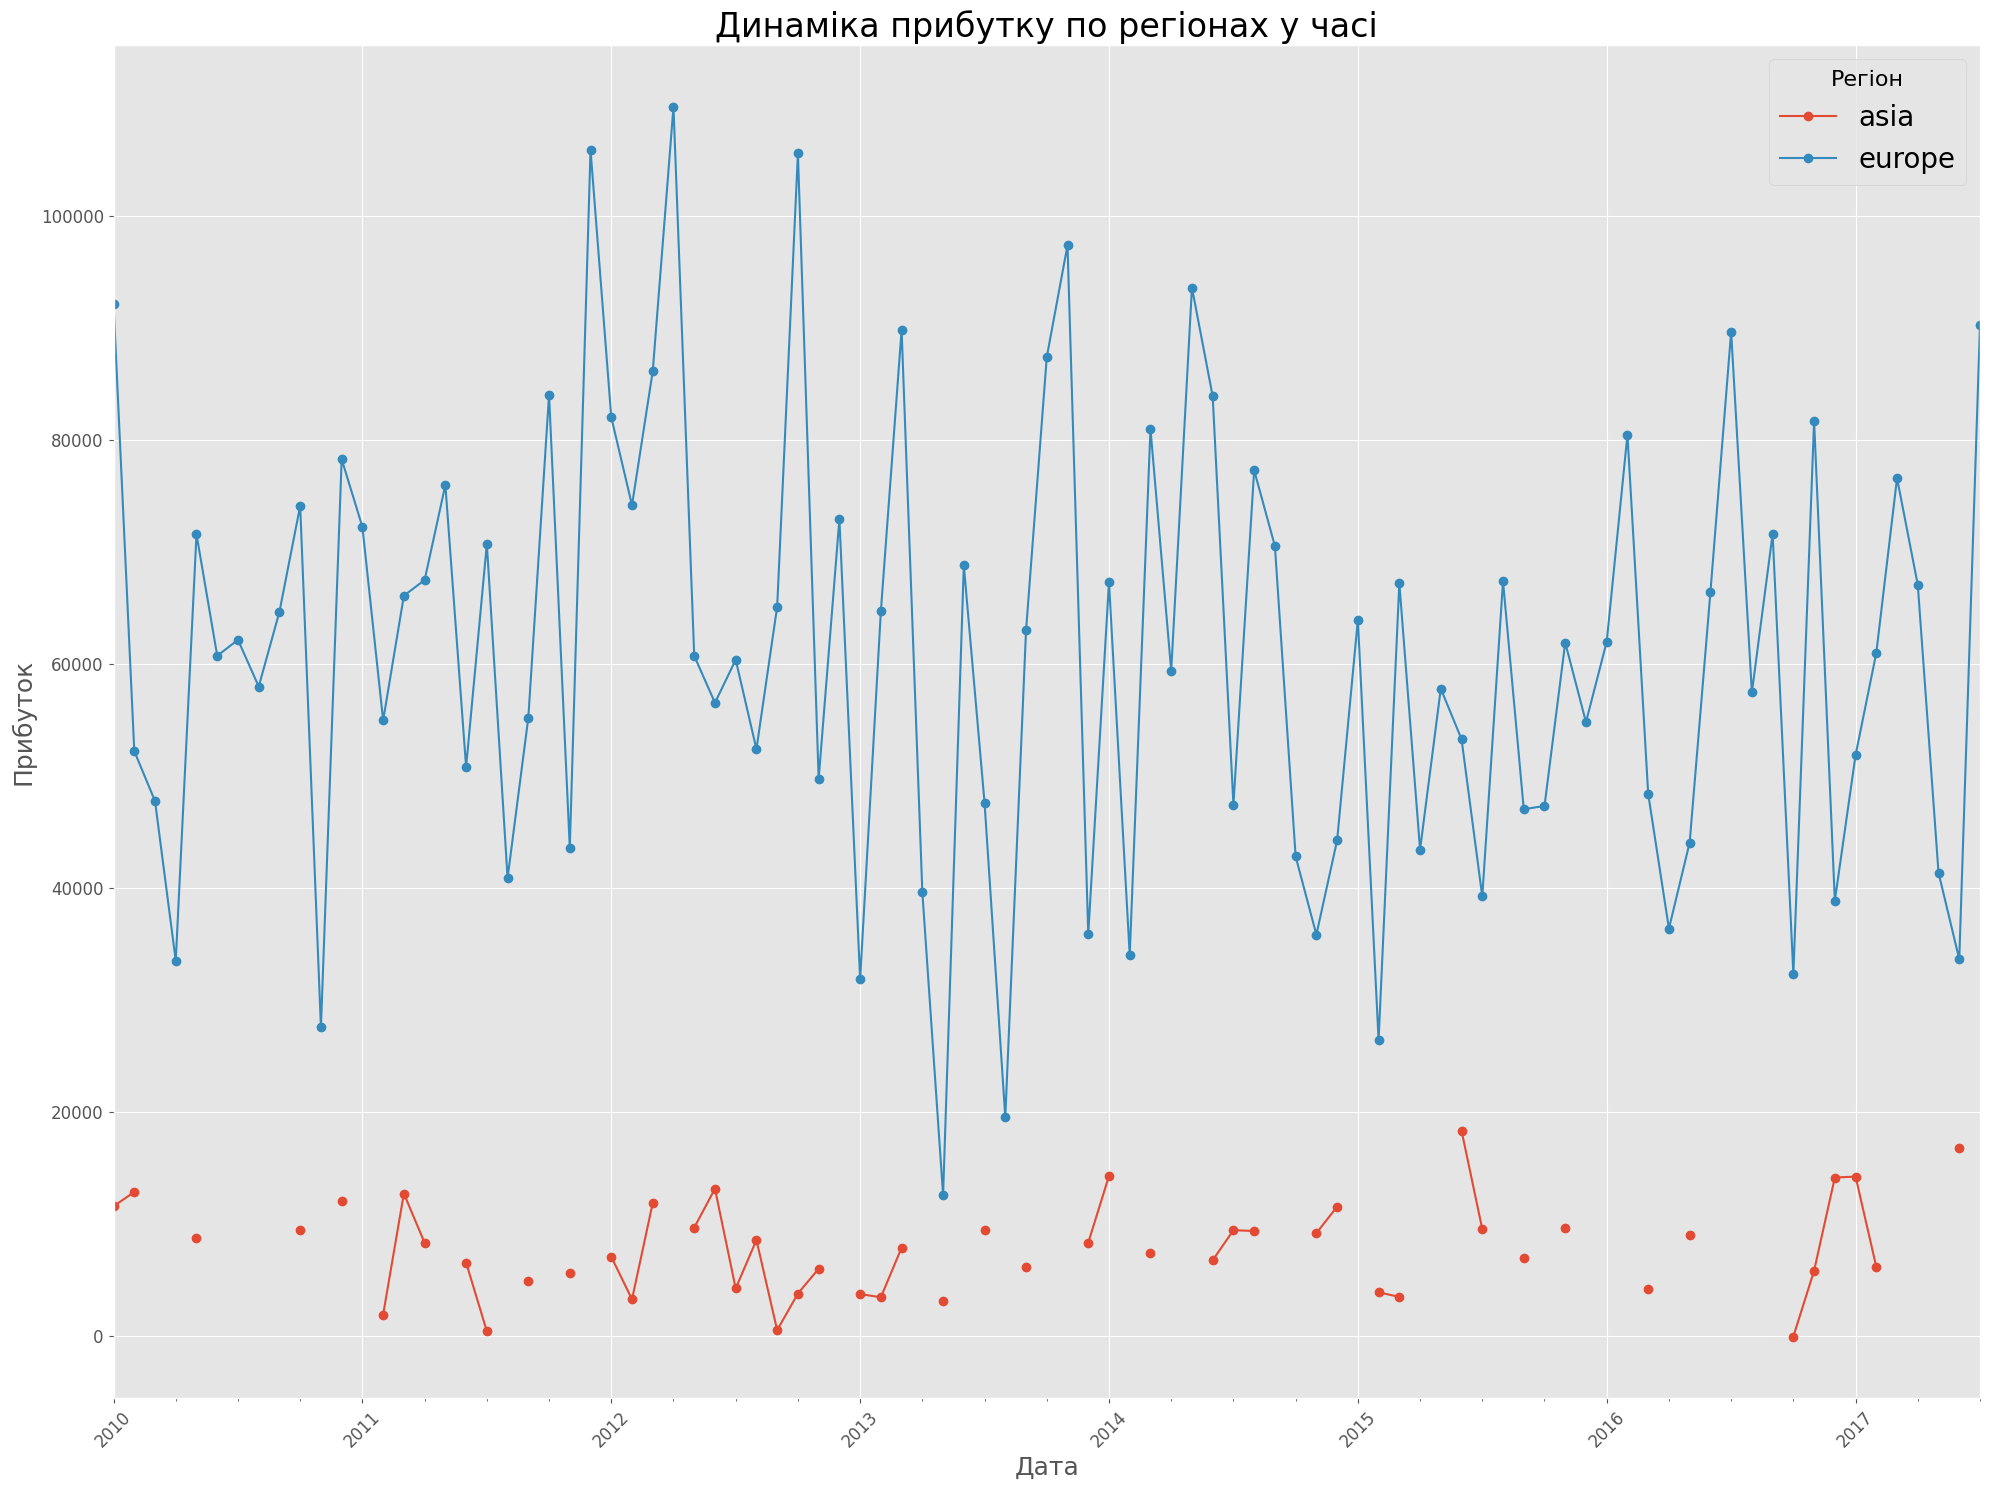

In [ ]:
region_grouped = df.groupby(['month', 'region'])['profit'].sum().reset_index()
pivot = region_grouped.pivot(index='month', columns='region', values='profit')
pivot.plot(marker='o', figsize=(20, 15))
plt.title('Динаміка прибутку по регіонах у часі', fontsize=24)
plt.xlabel('Дата', fontsize=18)
plt.ylabel('Прибуток', fontsize=18)
plt.grid(True)
plt.legend(title='Регіон', fontsize=20, title_fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


/tmp/ipython-input-65-3737298444.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['weekday', 'item_type'])['units sold'].sum().reset_index()


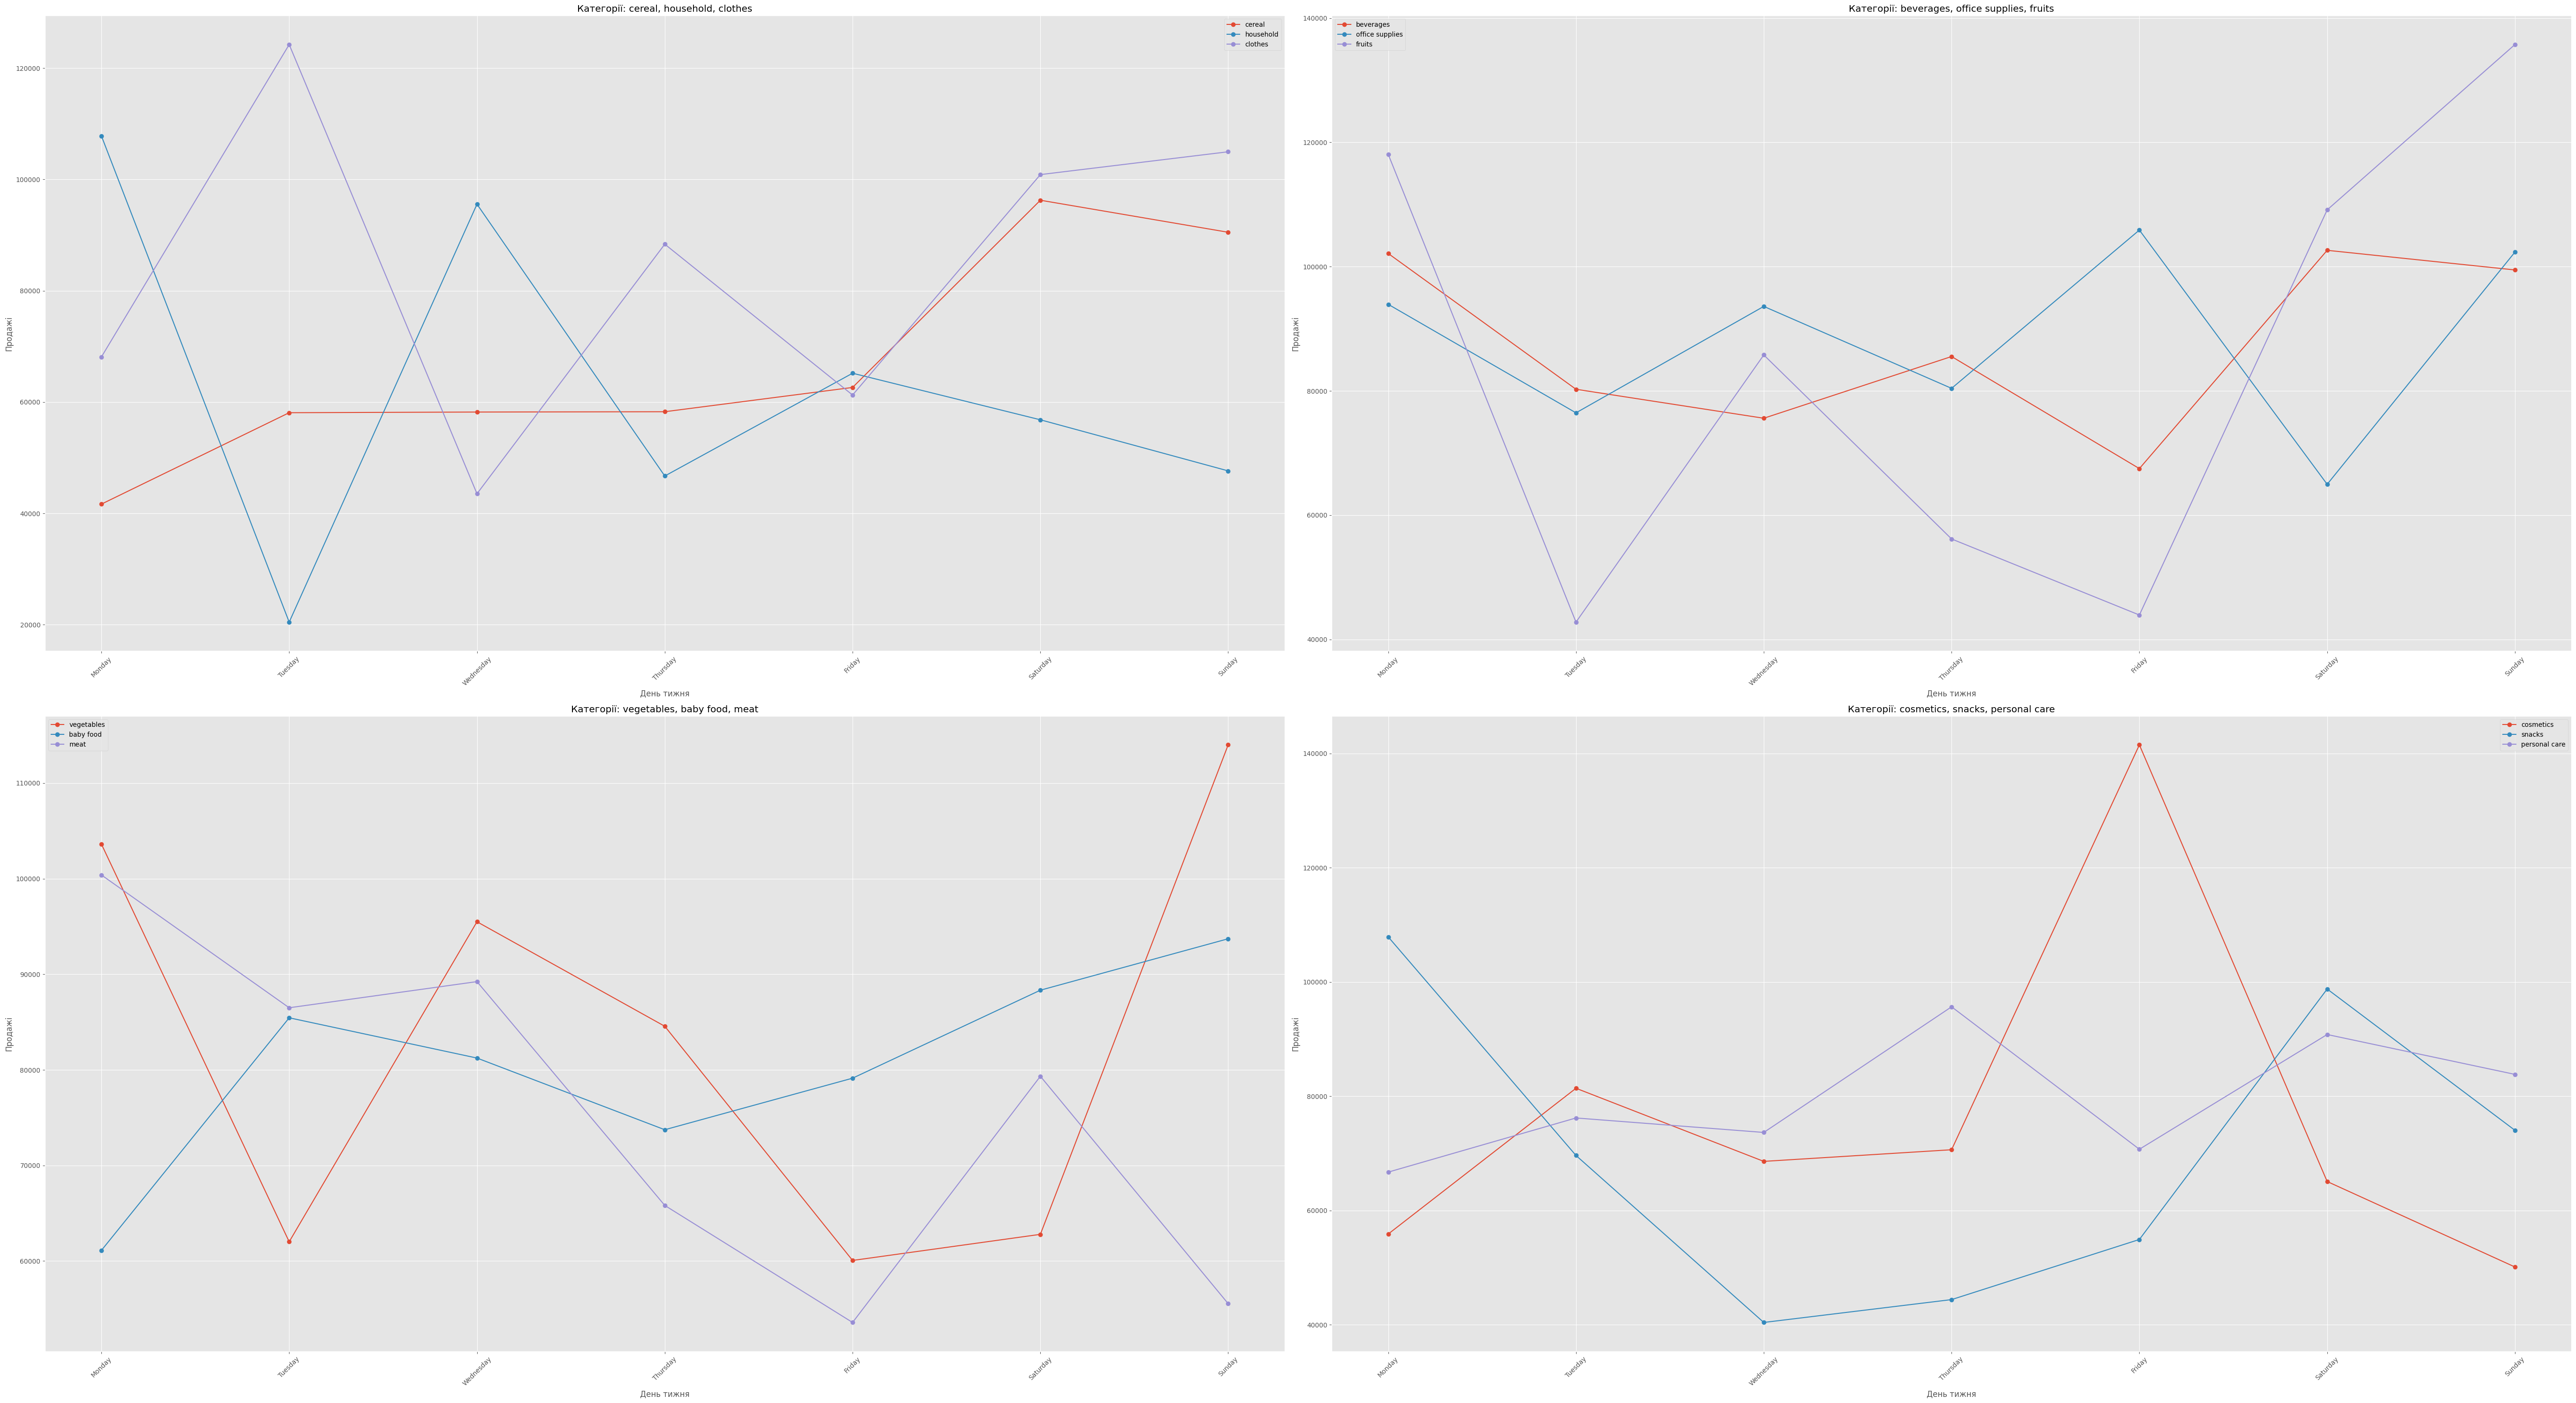

In [ ]:
#додаємо день тижня та впорядковуємо дані
df['weekday'] = df['order date'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=days_order, ordered=True)
grouped = df.groupby(['weekday', 'item_type'])['units sold'].sum().reset_index()


fig, ax = plt.subplots(2, 2, figsize=(55, 30))

cereal = grouped[grouped["item_type"] == "cereal"]
household = grouped[grouped["item_type"] == "household"]
clothes = grouped[grouped["item_type"] == "clothes"]
ax[0, 0].plot(cereal["weekday"], cereal["units sold"], label="cereal", marker='o')
ax[0, 0].plot(household["weekday"], household["units sold"], label="household", marker='o')
ax[0, 0].plot(clothes["weekday"], clothes["units sold"], label="clothes", marker='o')
ax[0, 0].set_title("Категорії: cereal, household, clothes")
ax[0, 0].legend()
ax[0, 0].set_xlabel("День тижня")
ax[0, 0].set_ylabel("Продажі")
ax[0, 0].grid(True)
ax[0, 0].tick_params(axis='x', rotation=45)

beverages = grouped[grouped["item_type"] == "beverages"]
office_supplies = grouped[grouped["item_type"] == "office supplies"]
fruits = grouped[grouped["item_type"] == "fruits"]
ax[0, 1].plot(beverages["weekday"], beverages["units sold"], label="beverages", marker='o')
ax[0, 1].plot(office_supplies["weekday"], office_supplies["units sold"], label="office supplies", marker='o')
ax[0, 1].plot(fruits["weekday"], fruits["units sold"], label="fruits", marker='o')
ax[0, 1].set_title("Категорії: beverages, office supplies, fruits")
ax[0, 1].legend()
ax[0, 1].set_xlabel("День тижня")
ax[0, 1].set_ylabel("Продажі")
ax[0, 1].grid(True)
ax[0, 1].tick_params(axis='x', rotation=45)

vegetables = grouped[grouped["item_type"] == "vegetables"]
baby_food = grouped[grouped["item_type"] == "baby food"]
meat = grouped[grouped["item_type"] == "meat"]
ax[1, 0].plot(vegetables["weekday"], vegetables["units sold"], label="vegetables", marker='o')
ax[1, 0].plot(baby_food["weekday"], baby_food["units sold"], label="baby food", marker='o')
ax[1, 0].plot(meat["weekday"], meat["units sold"], label="meat", marker='o')
ax[1, 0].set_title("Категорії: vegetables, baby food, meat")
ax[1, 0].legend()
ax[1, 0].set_xlabel("День тижня")
ax[1, 0].set_ylabel("Продажі")
ax[1, 0].grid(True)
ax[1, 0].tick_params(axis='x', rotation=45)

cosmetics = grouped[grouped["item_type"] == "cosmetics"]
snacks = grouped[grouped["item_type"] == "snacks"]
personal_care = grouped[grouped["item_type"] == "personal care"]
ax[1, 1].plot(cosmetics["weekday"], cosmetics["units sold"], label="cosmetics", marker='o')
ax[1, 1].plot(snacks["weekday"], snacks["units sold"], label="snacks", marker='o')
ax[1, 1].plot(personal_care["weekday"], personal_care["units sold"], label="personal care", marker='o')
ax[1, 1].set_title("Категорії: cosmetics, snacks, personal care")
ax[1, 1].legend()
ax[1, 1].set_xlabel("День тижня")
ax[1, 1].set_ylabel("Продажі")
ax[1, 1].grid(True)
ax[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
from ipywidgets import interact, widgets
df['month'] = df['order date'].dt.to_period('M').dt.to_timestamp()
countries = sorted(df['country'].dropna().astype(str).unique())

# Функція для побудови графіка по вибраній країні
def plot_profit_by_country(country):
    data = df[df['country'] == country]
    grouped = data.groupby('month')['profit'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    plt.plot(grouped['month'], grouped['profit'], marker='o', color='skyblue')
    plt.title(f'Прибуток по країні: {country}', fontsize=16)
    plt.xlabel('Місяць')
    plt.ylabel('Прибуток')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Створюємо випадаючий список
interact(plot_profit_by_country,
    country=widgets.Dropdown(options=countries, description='Країна:'));


interactive(children=(Dropdown(description='Країна:', options=('albania', 'andorra', 'armenia', 'austria', 'be…

#Висновки
##Ключові метрики діяльності компанії
Компанія опрацювала 6576524 замовлень у 45 країнах.
Загальний прибуток становив 6327907.1\$.

Середній прибуток на замовлення — 4764.990286144578\$.

Найбільше прибутку принесли:
* категорія: beverages
* канал: offline
* країна: Macedonia

##Аналіз інтервалу від замовлення до відвантаження
Середній прибуток не має прямої залежності від тривалості доставки.

Надто довгі доставки частіше повʼязані з нижчим прибутком.

##Динаміка продажів у часі
Є сезонність у деяких категоріях: наприклад, Beverages, Clothes, Cosmetics мають піки в окремі місяці.

У більшості категорій видно поступове зростання/зниження в часі.

##Продажі по днях тижня

Перелік категорій із вагомими сплесками продажів упродовж тижня:
cereal,
clothes,
beverages.
Деякі категорії (наприклад, Snacks, Personal Care) мають рівномірний розподіл.

##Бізнес-висновки:
* Онлайн-канал ефективний для обсягів, але офлайн — для прибутковості.
* Географічний фокус на топ-5 країнах може дати суттєве зростання.
* Оптимізувати логістику в країнах із довгим терміном доставки.
* Для деяких категорій спостерігаються виражені сплески в конкретні дні тижня — можливість оптимізації розкладу реклами та постачання.